In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import eda_function



In [2]:
file_path = "data.csv"

dynamic_pricing_data = pd.read_csv(file_path)

dynamic_pricing_data = eda_function(dynamic_pricing_data)

print(dynamic_pricing_data)

     product_item_sku_id  no_of_days_sold  total_sales start_date   end_date  \
0             88-GIFT100                9            9 2020-07-31 2023-09-14   
1            88-GIFT1000                8           15 2020-10-25 2022-12-12   
2             88-GIFT200                8           10 2020-12-17 2023-01-09   
3             88-GIFT300                6            9 2020-12-23 2022-12-22   
4             88-GIFT500               11           13 2020-12-11 2023-08-14   
...                  ...              ...          ...        ...        ...   
1031           TP-MA3DAF               15           17 2020-08-25 2022-08-14   
1032           TP-MA3DAK               31           31 2020-08-13 2022-10-09   
1033           TP-MA3DAQ               49           51 2020-09-14 2022-10-02   
1034           TP-MA3DAT               10           10 2020-08-08 2021-07-08   
1035          TP-MA3DATX                7            7 2021-01-28 2021-10-31   

      no_of_price_changes  total_days  

176    111
175     70
568     62
174     59
205     56
      ... 
455      1
456      1
775      1
457      1
0        1
Name: no_of_price_changes, Length: 1036, dtype: int32


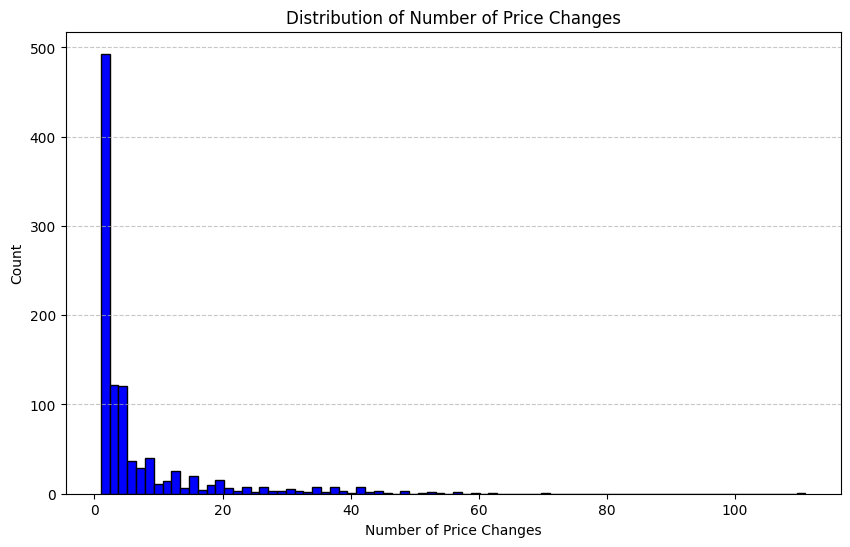

In [14]:
dynamic_pricing_data['no_of_price_changes'] = dynamic_pricing_data['no_of_price_changes'].astype(int)
print(dynamic_pricing_data['no_of_price_changes'].sort_values(ascending=False))

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(dynamic_pricing_data['no_of_price_changes'], bins=80, color='blue', edgecolor='black')
plt.xlabel('Number of Price Changes')
plt.ylabel('Count')
plt.title('Distribution of Number of Price Changes')

# plt.xticks(range(0, max(dynamic_pricing_data['no_of_price_changes']) + 6, 5))

# plt.yticks(range(0, max(dynamic_pricing_data['no_of_price_changes']) + 6, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

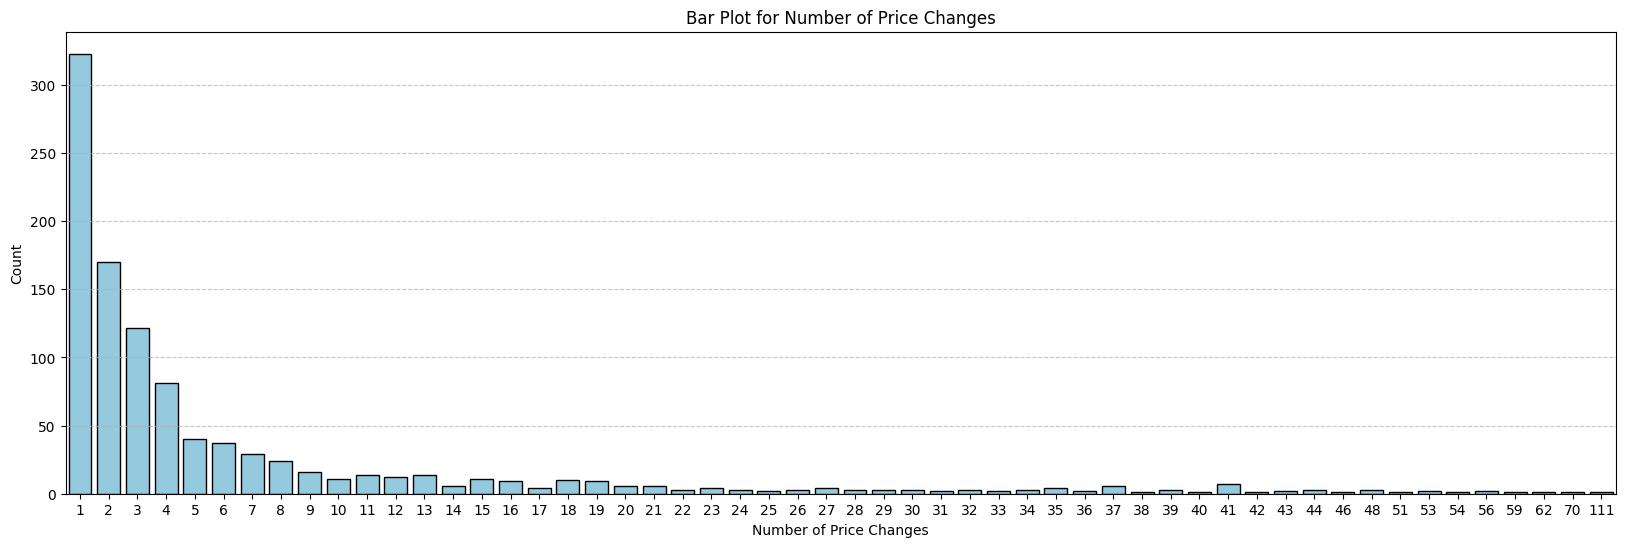

In [16]:
# Convert 'no_of_price_changes' to int for proper plotting
dynamic_pricing_data['no_of_price_changes'] = dynamic_pricing_data['no_of_price_changes'].astype(int)

# Count the occurrences of each number of price changes
price_count = dynamic_pricing_data['no_of_price_changes'].value_counts().sort_index()

# Plotting a bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x=price_count.index, y=price_count.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Price Changes')
plt.ylabel('Count')
plt.title('Bar Plot for Number of Price Changes')
# plt.xticks(range(0, max(dynamic_pricing_data['no_of_price_changes']) + 6, 5))
# plt.yticks(range(0, max(dynamic_pricing_data['no_of_price_changes']) + 6, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

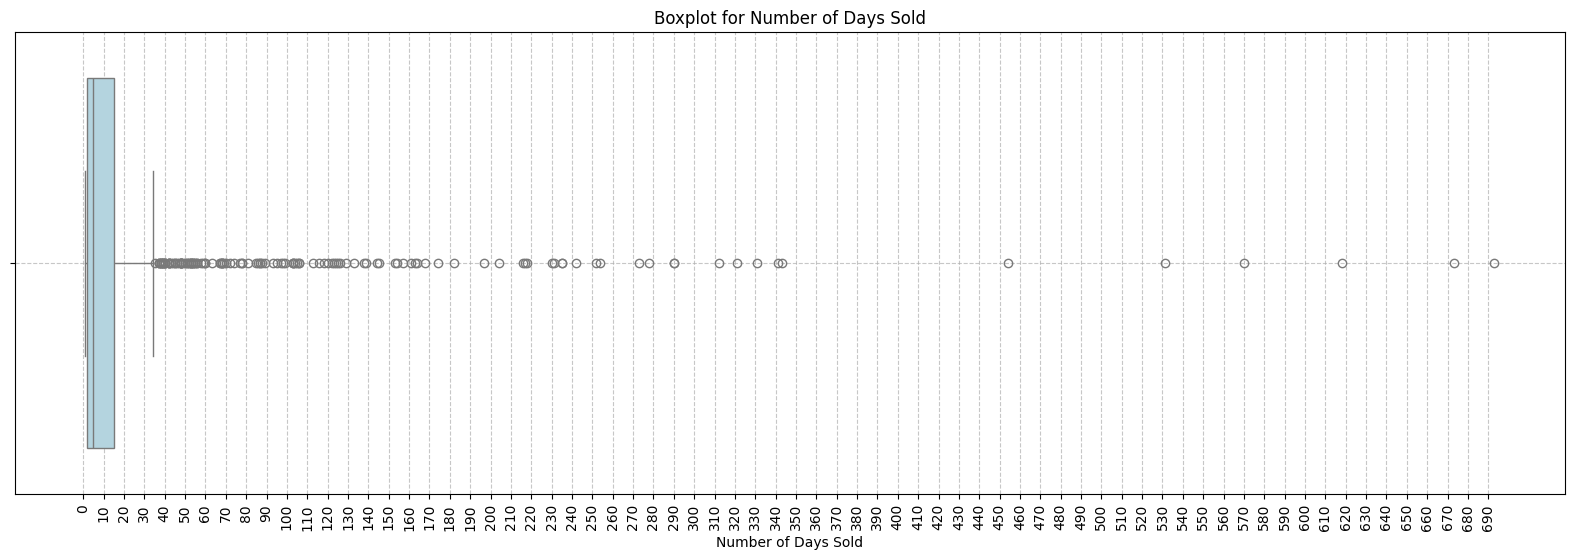

In [17]:
dynamic_pricing_data['no_of_days_sold'] = dynamic_pricing_data['no_of_days_sold'].astype(int)

# Plotting a boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x=dynamic_pricing_data['no_of_days_sold'], color='lightblue')
plt.xlabel('Number of Days Sold')
plt.title('Boxplot for Number of Days Sold')
plt.xticks(range(0, max(dynamic_pricing_data['no_of_days_sold']) + 6, 10), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

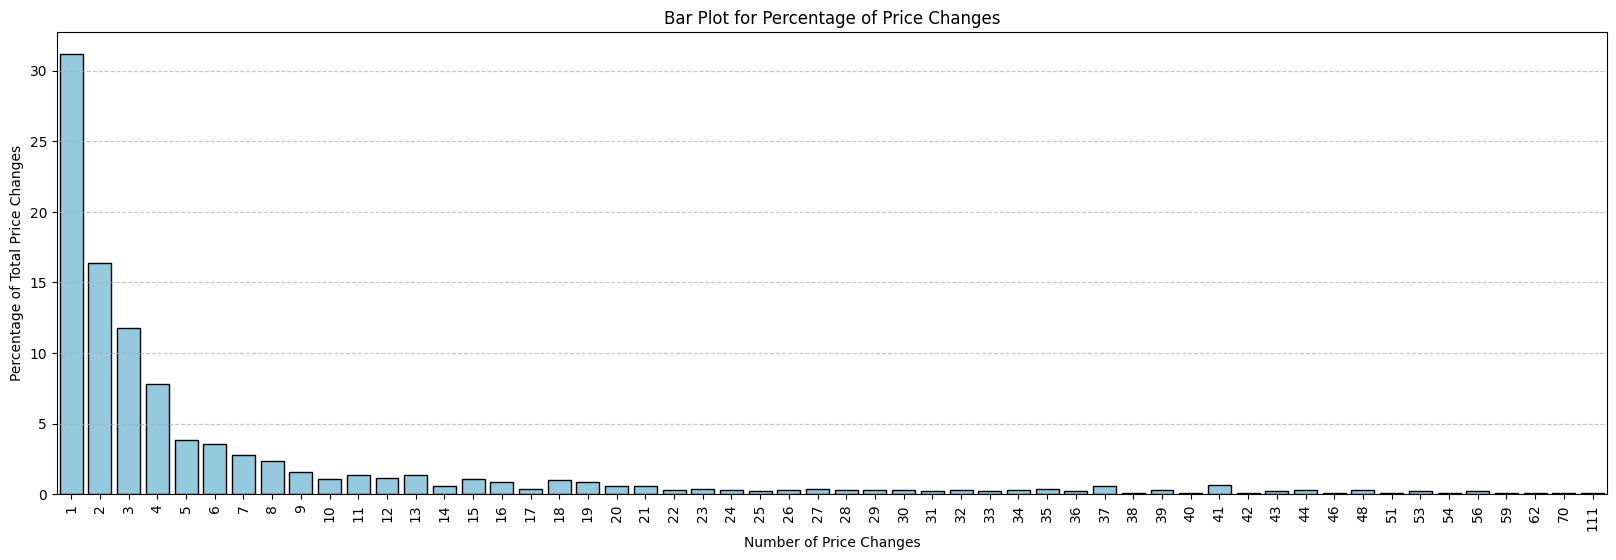

In [18]:
# Calculate the percentage of no_of_price_changes relative to the total
dynamic_pricing_data['percentage_of_price_changes'] = (dynamic_pricing_data['no_of_price_changes'] / dynamic_pricing_data['no_of_price_changes'].sum()) * 100

# Count the occurrences of each number of price changes
price_count = dynamic_pricing_data['no_of_price_changes'].value_counts().sort_index()

# Calculate the percentage for each bar
total_price_changes = dynamic_pricing_data['no_of_price_changes'].count()
percentage_per_bar = (price_count / total_price_changes) * 100

# Plotting a bar plot with percentage on the y-axis
plt.figure(figsize=(20, 6))
sns.barplot(x=price_count.index, y=percentage_per_bar, color='skyblue', edgecolor='black')
plt.xlabel('Number of Price Changes')
plt.ylabel('Percentage of Total Price Changes')
plt.title('Bar Plot for Percentage of Price Changes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

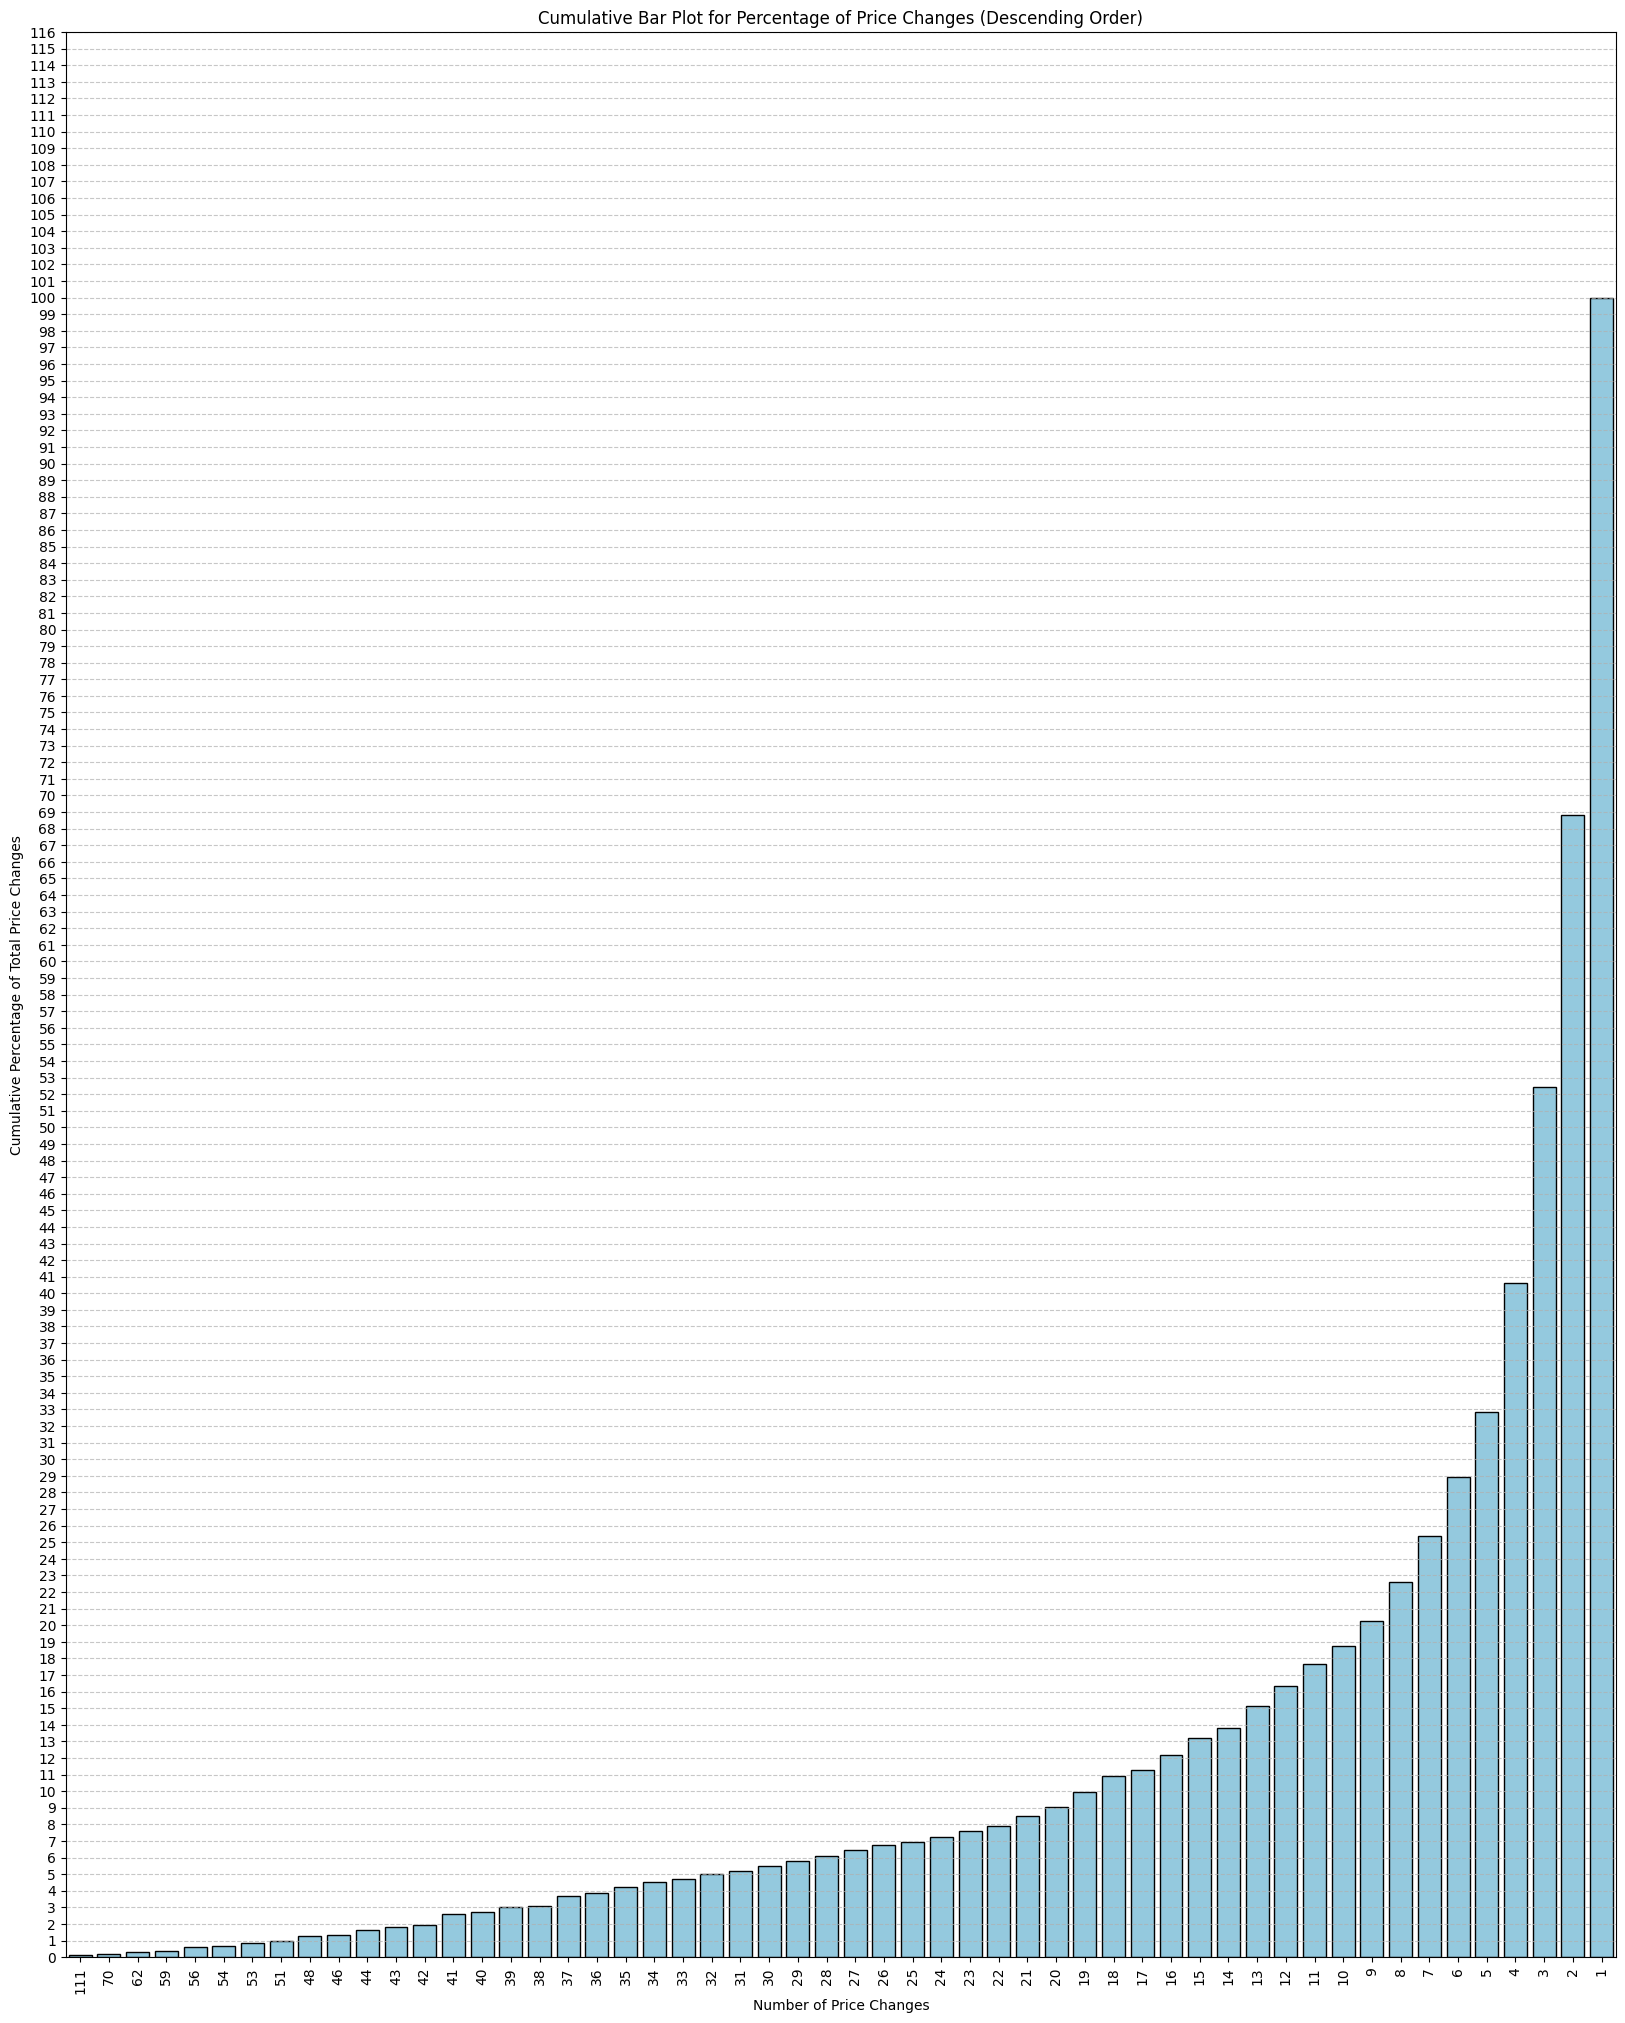

In [19]:
# Calculate the percentage of no_of_price_changes relative to the total
dynamic_pricing_data['percentage_of_price_changes'] = (dynamic_pricing_data['no_of_price_changes'] / dynamic_pricing_data['no_of_price_changes'].sum()) * 100

# Count the occurrences of each number of price changes
price_count = dynamic_pricing_data['no_of_price_changes'].value_counts().sort_index()

# Calculate the total number of price changes
total_price_changes = dynamic_pricing_data['no_of_price_changes'].count()

# Calculate the cumulative percentage in descending order
cumulative_percentage = price_count[::-1].cumsum()[::-1] / total_price_changes * 100

# Plotting a bar plot with cumulative percentage on the y-axis
plt.figure(figsize=(20, 25))
sns.barplot(x=cumulative_percentage.index, y=cumulative_percentage.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Price Changes')
plt.ylabel('Cumulative Percentage of Total Price Changes')
plt.title('Cumulative Bar Plot for Percentage of Price Changes (Descending Order)')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.yticks(range(0, max(dynamic_pricing_data['no_of_price_changes']) + 6, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()